In [25]:
import pandas as pd

import os 
      
# Get the current working 
# directory (CWD) 

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                                  # matplotlib.pyplot is a powerful collection of functions to plot complex figures  and charts
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.metrics import mean_squared_error


In [31]:
dataset=pd.read_csv('./Full_Data_New2.csv',sep=';')

### Data Information

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price_Euro                  51707 non-null  float64
 1   Room_Type                   51707 non-null  object 
 2   Room_Private                51707 non-null  bool   
 3   Person_Capacity             51707 non-null  float64
 4   Host_is_Superhost           51707 non-null  bool   
 5   MultiRoom                   51707 non-null  int64  
 6   Business                    51707 non-null  int64  
 7   Cleanliness_Rating          51707 non-null  float64
 8   guest_satisfaction_overall  51707 non-null  float64
 9   bedrooms                    51707 non-null  int64  
 10  Dist_CityCenter             51707 non-null  float64
 11  metro_dist                  51707 non-null  float64
 12  Attraction_Index            51707 non-null  float64
 13  Restaurant_Index            517

In [15]:
dataset.isna().sum()

Price_Euro                    0
Room_Type                     0
Room_Private                  0
Person_Capacity               0
Host_is_Superhost             0
MultiRoom                     0
Business                      0
Cleanliness_Rating            0
guest_satisfaction_overall    0
bedrooms                      0
Dist_CityCenter               0
metro_dist                    0
Attraction_Index              0
Restaurant_Index              0
Longitude                     0
Latitude                      0
Time of Week                  0
City                          0
dtype: int64

#### First 5 Rows

In [10]:
dataset.head()

,Price_Euro,Room_Type,Room_Private,Person_Capacity,Host_is_Superhost,MultiRoom,Business,Cleanliness_Rating,guest_satisfaction_overall,bedrooms,Dist_CityCenter,metro_dist,Attraction_Index,Restaurant_Index,Longitude,Latitude,Time of Week,City
0,194.033698,Private room,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,4.166708,6.846473,4.90569,52.41772,Weekday,Amsterdam
1,344.245776,Private room,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,33.421209,58.342928,4.90005,52.37432,Weekday,Amsterdam
2,264.101422,Private room,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,3.985908,6.646700,4.97512,52.36103,Weekday,Amsterdam
3,433.529398,Private room,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,26.119108,60.973565,4.89417,52.37663,Weekday,Amsterdam
4,485.552926,Private room,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,29.272733,56.811677,4.90051,52.37508,Weekday,Amsterdam


In [11]:
dataset.describe()

,Price_Euro,Person_Capacity,MultiRoom,Business,Cleanliness_Rating,guest_satisfaction_overall,bedrooms,Dist_CityCenter,metro_dist,Attraction_Index,Restaurant_Index,Longitude,Latitude
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,13.423792,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,9.807985,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,0.926301,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,6.380926,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,11.468305,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,17.415082,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,100.000000,100.000000,23.786020,52.641410


In [4]:
from collections import Counter                        #   The number of various categories or classes of each feature is counted and printed
for i in dataset:                                         #   using the Counter function
    if dataset[i].values.dtype==('O') or dataset[i].values.dtype==('bool'):
        print(i,':', Counter(dataset[i]))

Room_Type : Counter({'Entire home/apt': 32648, 'Private room': 18693, 'Shared room': 366})
Room_Private : Counter({False: 33014, True: 18693})
Host_is_Superhost : Counter({False: 38475, True: 13232})
Time of Week : Counter({'Weekend': 26207, 'Weekday': 25500})
City : Counter({'London': 9993, 'Rome': 9027, 'Paris': 6688, 'Lisbon': 5763, 'Athens': 5280, 'Budapest': 4022, 'Vienna': 3537, 'Barcelona': 2833, 'Berlin': 2484, 'Amsterdam': 2080})


In [17]:
dataset.corr()

,Price_Euro,Room_Private,Person_Capacity,Host_is_Superhost,MultiRoom,Business,Cleanliness_Rating,guest_satisfaction_overall,bedrooms,Dist_CityCenter,metro_dist,Attraction_Index,Restaurant_Index,Longitude,Latitude
Price_Euro,1.000000,-0.171949,0.203077,-0.045478,-0.052926,0.037144,-0.006082,-0.001888,0.221653,-0.044725,-0.061025,0.292396,0.144094,-0.173833,0.211805
Room_Private,-0.171949,1.000000,-0.499993,-0.049501,0.137026,-0.040198,-0.030983,-0.033401,-0.155889,0.213351,0.101981,0.029140,-0.136846,-0.201709,0.140762
Person_Capacity,0.203077,-0.499993,1.000000,0.031431,-0.054326,0.110668,0.003256,0.005181,0.560627,-0.128488,-0.037267,-0.050487,0.038059,0.146848,-0.168265
Host_is_Superhost,-0.045478,-0.049501,0.031431,1.000000,0.097520,-0.108506,0.272376,0.280062,0.024250,-0.056113,-0.000722,-0.088949,-0.018348,0.185748,-0.113811
MultiRoom,-0.052926,0.137026,-0.054326,0.097520,1.000000,-0.470725,0.041064,0.054254,-0.000659,0.033426,0.043365,-0.041412,-0.037402,0.041260,-0.034058
Business,0.037144,-0.040198,0.110668,-0.108506,-0.470725,1.000000,-0.107310,-0.208160,-0.026741,-0.164767,-0.109153,0.093720,0.083999,-0.088943,-0.126433
Cleanliness_Rating,-0.006082,-0.030983,0.003256,0.272376,0.041064,-0.107310,1.000000,0.714045,0.033489,-0.030202,0.010441,-0.075372,-0.005995,0.120379,-0.092502
guest_satisfaction_overall,-0.001888,-0.033401,0.005181,0.280062,0.054254,-0.208160,0.714045,1.000000,0.047573,-0.004178,0.029788,-0.074146,-0.008765,0.156079,-0.033957
bedrooms,0.221653,-0.155889,0.560627,0.024250,-0.000659,-0.026741,0.033489,0.047573,1.000000,-0.006262,0.044431,-0.063773,-0.057726,0.013688,-0.104694
Dist_CityCenter,-0.044725,0.213351,-0.128488,-0.056113,0.033426,-0.164767,-0.030202,-0.004178,-0.006262,1.000000,0.558064,-0.242862,-0.467791,-0.147424,0.405878


In [93]:
dataset.columns

Index(['Price_Euro', 'Room_Type', 'Person_Capacity', 'MultiRoom', 'Business',
       'Cleanliness_Rating', 'guest_satisfaction_overall', 'bedrooms',
       'Dist_CityCenter', 'metro_dist', 'Attraction_Index', 'Restaurant_Index',
       'Longitude', 'Latitude', 'Time of Week', 'City', 'Room_Private_True',
       'Host_is_Superhost_True'],
      dtype='object')

Text(0.5, 1.0, 'Scatter Plot')

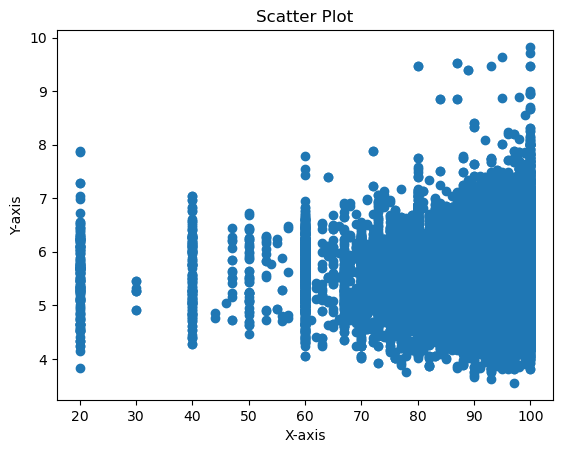

In [98]:
plt.scatter(dataset['guest_satisfaction_overall'],dataset['Price_Euro'])

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

### Correlation HeatMap Matrix 

In [18]:
corr_matrix=dataset.corr()

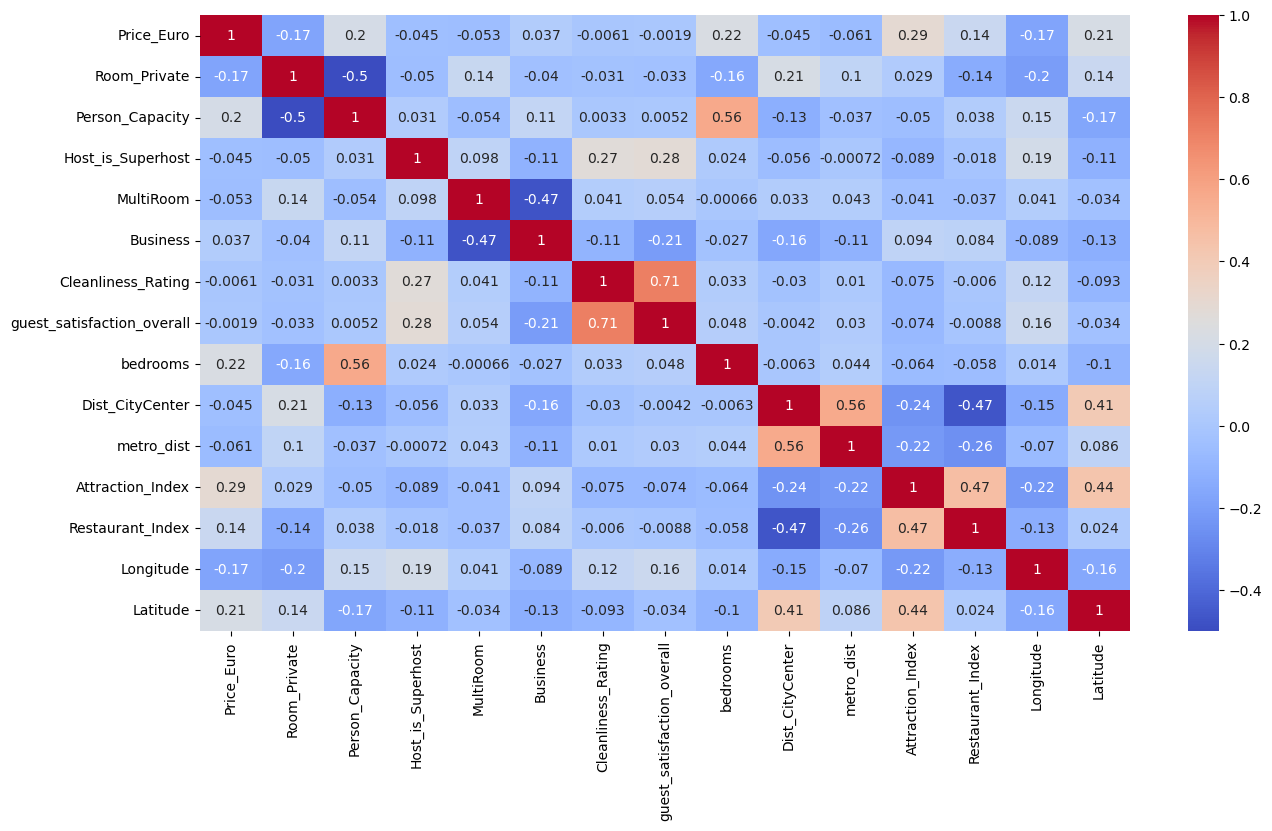

In [19]:
fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

plt.show()

### Histogram of RoomPrice

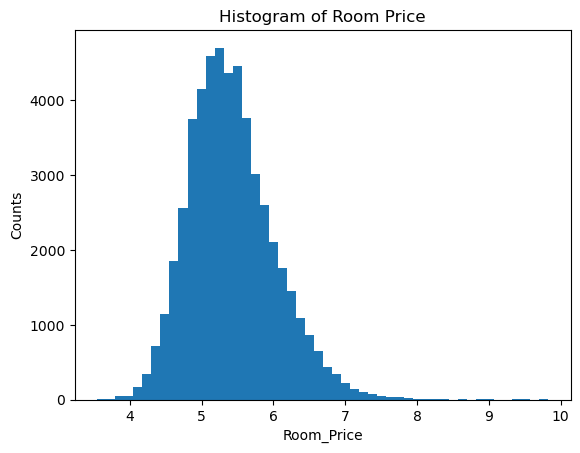

In [67]:
plt.hist(dataset['Price_Euro'], bins=50)

# Add axis labels and title
plt.xlabel('Room_Price')
plt.ylabel('Counts')
plt.title('Histogram of Room Price')

# Show the plot
plt.show()

### Log Transformed is applied to transorm RoomPrice into Normal Distribution

In [32]:
dataset['Price_Euro'] = np.log(dataset['Price_Euro'])

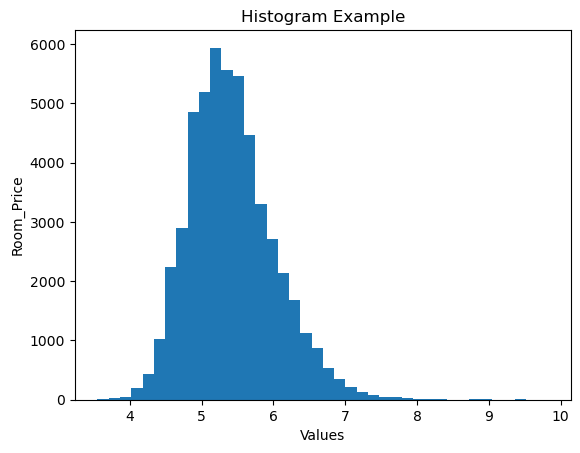

In [33]:
plt.hist(dataset['Price_Euro'], bins=40)

# Add axis labels and title
plt.xlabel('Values')
plt.ylabel('Room_Price')
plt.title('Histogram Example')

# Show the plot
plt.show()

### Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset['Room_Type'] = le.fit_transform(dataset['Room_Type'])
dataset['Time of Week'] = le.fit_transform(dataset['Time of Week'])
dataset['City'] = le.fit_transform(dataset['City'])

In [35]:
dataset=pd.get_dummies(dataset,drop_first=True,columns=['Room_Private','Host_is_Superhost'])

### Outlier Detection using Boxplot

<AxesSubplot:>

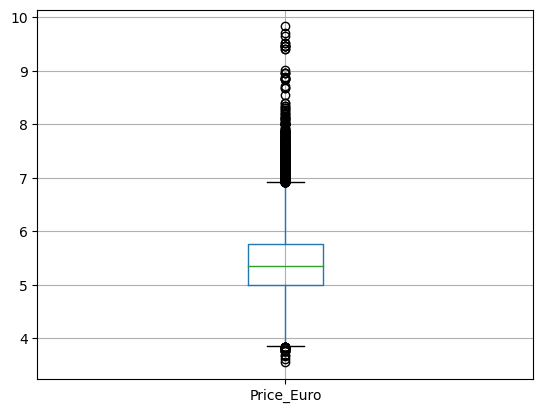

In [9]:
dataset[['Price_Euro']].boxplot()

### Apllying Normalistion of Input Features

In [37]:
X=dataset.drop(['Price_Euro'],axis=1)
Y=dataset['Price_Euro']

### Dataset split to Train and Test sets

In [38]:
from sklearn.model_selection import train_test_split as tts                     # The Scaled Dataframe is splitted into train and test datasets
xtrain, xtest, ytrain, ytest = tts(X,Y,train_size=.70,random_state=0)

In [39]:
xtrain = scaler.fit_transform(xtrain)
xtest= scaler.fit_transform(xtest)

### Fit Linear Model and Prediction

In [112]:
from sklearn.linear_modelmodel import LinearRegression
reg = LinearRegression()

In [113]:
reg.fit(xtrain, ytrain)
reg.score(xtrain, ytrain)

0.2200863610891841

In [83]:
y_pred = reg.predict(xtest)

# calculate mean squared error
rmse = mean_squared_error(ytest, y_pred, squared=False)
print("Root Mean squared error: ", rmse)

Root Mean squared error:  0.38763402913879524


## Linear Regression using Stochastic Gradient Descent

In [63]:
X_scaled= scaler.fit_transform(X)

In [72]:
# Implementing Regularization
# Tuning the SGDRegressor parameters 'eta0' (learning rate) and 'max_iter', along with the regularization parameter alpha using Grid Search
sgdr = SGDRegressor(random_state = 1, penalty = 'elasticnet')
grid_param = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000]
              ,'alpha': [.001, .01, .1, 1,10, 100], 'l1_ratio': [0,0.25,0.5,0.75,1]}

# create a list of scoring metrics to evaluate


gd_sr = GridSearchCV(estimator=sgdr, param_grid=grid_param, scoring='r2',  cv=5)

gd_sr.fit(X_scaled, Y)

results = pd.DataFrame.from_dict(gd_sr.cv_results_)
print("Cross-validation results:\n", results)

Cross-validation results:
      mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0         0.275798      0.079785         0.001172        0.000347       0.001   
1         0.241275      0.037245         0.000934        0.000031       0.001   
2         0.262983      0.054683         0.001108        0.000838       0.001   
3         0.254662      0.044168         0.000963        0.000034       0.001   
4         0.241823      0.048643         0.001089        0.000218       0.001   
..             ...           ...              ...             ...         ...   
595       0.067522      0.007002         0.000800        0.000400         100   
596       0.062745      0.004372         0.000201        0.000401         100   
597       0.064644      0.006227         0.000902        0.000491         100   
598       0.057603      0.005281         0.000802        0.000751         100   
599       0.059082      0.003502         0.000501        0.000448         100   



In [73]:
best_parameters = gd_sr.best_params_
print("Best parameters: ", best_parameters)

Best parameters:  {'alpha': 0.1, 'eta0': 0.01, 'l1_ratio': 0.5, 'max_iter': 10000}


In [74]:
best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print("Best result: ", best_result)

Best result:  0.3686346916742093


In [58]:
best_model = gd_sr.best_estimator_
print("Intercept: ", best_model.intercept_)

Intercept:  [5.41567056]


In [51]:
print(pd.DataFrame(zip(X.columns, best_model.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))

Cross-validation results:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.057402      0.015167         0.001192        0.000383      0.0001   
1        0.058853      0.007107         0.000620        0.000507      0.0001   
2        0.052281      0.007506         0.000813        0.000407      0.0001   
3        0.047526      0.005495         0.000617        0.000505      0.0001   
4        0.058560      0.006295         0.000991        0.000011      0.0001   
5        0.043844      0.003140         0.001102        0.000202       0.001   
6        0.055438      0.004370         0.001011        0.000010       0.001   
7        0.052696      0.005271         0.000417        0.000512       0.001   
8        0.054538      0.003948         0.000776        0.000390       0.001   
9        0.056489      0.005509         0.000800        0.000400       0.001   
10       0.047873      0.004118         0.000616        0.000504        0.01   
11       0.05

In [60]:
y_pred_SGD = gd_sr.predict(xtest)

# calculate mean squared error
rmse = mean_squared_error(ytest, y_pred_SGD, squared=False)
print("Root Mean squared error: ", rmse)

Root Mean squared error:  0.41258514567747373


In [52]:
best_params = gd_sr.best_params_
best_r2 = gd_sr.best_score_


print("Best parameters: ", best_params)
print("Best R2: ", best_r2)


Best parameters:  {'alpha': 0.1, 'l1_ratio': 0.5}
Best R2:  0.3686346916742093


### Support Vector Regression

In [10]:
dataset.columns

Index(['Price_Euro', 'Room_Type', 'Person_Capacity', 'MultiRoom', 'Business',
       'Cleanliness_Rating', 'guest_satisfaction_overall', 'bedrooms',
       'Dist_CityCenter', 'metro_dist', 'Attraction_Index', 'Restaurant_Index',
       'Longitude', 'Latitude', 'Time of Week', 'City', 'Room_Private_True',
       'Host_is_Superhost_True'],
      dtype='object')

In [68]:
from sklearn.svm import SVR

In [71]:
####################################################################################
# Implementing Support Vector Regression
# Tuning the SVR parameters 'kernel', 'C', 'epsilon' and implementing cross-validation using Grid Search
svr = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)


svr.fit(xtrain, ytrain)

KeyboardInterrupt: 

In [70]:
best_parameters = gd_SVR.best_params_
print("Optimal parameters:\n", best_parameters)

best_result = gd_SVR.best_score_ # Mean cross-validated score of the best_estimator
print("Best mean cross-validated score:\n", best_result)

Optimal parameters:
 {'C': 100, 'epsilon': 100, 'kernel': 'linear'}
Best mean cross-validated score:
 -6.205804981056327


## Prediction of Price using Artificial Neural Network

In [40]:
import tensorflow as tf

In [41]:
from tensorflow.python.keras.models import Sequential 

from tensorflow.python.keras.layers import Dense, Dropout


In [45]:
model = Sequential()


model.add(Dense(32, input_dim=17, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                576       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [47]:
history = model.fit(xtrain, ytrain, epochs=20, batch_size=10,  validation_split=0.3)

Epoch 1/20
2534/2534 [==============================] - 10s 4ms/step - loss: 0.9776 - mse: 0.9776 - mae: 0.6964 - val_loss: 0.3128 - val_mse: 0.3128 - val_mae: 0.4445
Epoch 2/20
2534/2534 [==============================] - 10s 4ms/step - loss: 0.2017 - mse: 0.2017 - mae: 0.3383 - val_loss: 0.1692 - val_mse: 0.1692 - val_mae: 0.3076
Epoch 3/20
2534/2534 [==============================] - 12s 5ms/step - loss: 0.1545 - mse: 0.1545 - mae: 0.2930 - val_loss: 0.1269 - val_mse: 0.1269 - val_mae: 0.2670
Epoch 4/20
2534/2534 [==============================] - 11s 4ms/step - loss: 0.1417 - mse: 0.1417 - mae: 0.2796 - val_loss: 0.1200 - val_mse: 0.1200 - val_mae: 0.2620
Epoch 5/20
2534/2534 [==============================] - 10s 4ms/step - loss: 0.1354 - mse: 0.1354 - mae: 0.2733 - val_loss: 0.1617 - val_mse: 0.1617 - val_mae: 0.2992
Epoch 6/20
2534/2534 [==============================] - 12s 5ms/step - loss: 0.1309 - mse: 0.1309 - mae: 0.2678 - val_loss: 0.1133 - val_mse: 0.1133 - val_mae: 0.253

In [48]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [49]:
yhat= model.predict(xtest)
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(yhat,ytest))
print('RMSE:',rmse)

RMSE: 0.3380161603976141


In [207]:
print(mean_squared_error(yhat,ytest))

0.10224213896949072


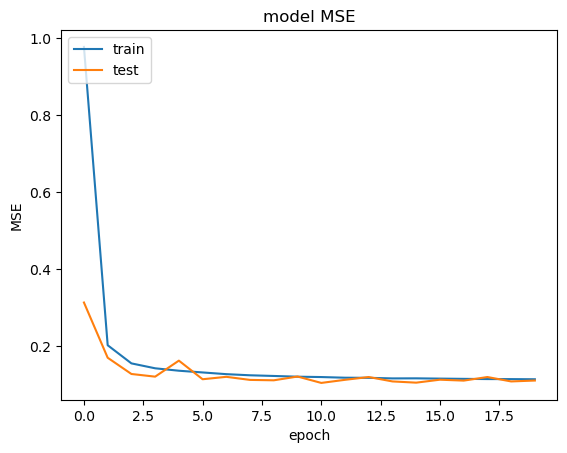

In [50]:

# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

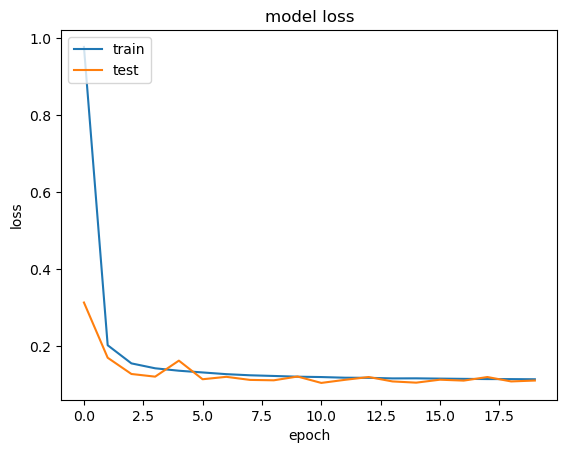

In [51]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
# Create a random forest regressor
rf = RandomForestRegressor(random_state=42)                    

# Define the parameter grid to search over
param_grid_RF = {
    'n_estimators': [ 100, 200],                                #Reference Aurelien Geron !st sem
    'max_depth': [ 4, 5 ],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object
grid_search_RF = GridSearchCV(rf, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search_RF.fit(X_scaled, Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 4, 5, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 200]})

In [66]:
# Make predictions on the testing data using the best model
best_rf = grid_search_RF.best_estimator_
y_pred_RF = best_rf.predict(xtest)

# Compute the mean squared error
rmse_RF = mean_squared_error(ytest, y_pred_RF, squared=False)
print("Root Mean squared error:", rmse_RF)

# Print the best parameters and score
print("Best parameters: ", grid_search_RF.best_params_)
print("Best Score: ", grid_search_RF.best_score_)

Root Mean squared error: 0.23959372762273642
Best parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score:  0.4110500038436862
